<a href="https://colab.research.google.com/github/kavyagayathri/Data-Science/blob/main/Linear_regression_on_tips.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import seaborn as sns
df = sns.load_dataset('tips')


In [8]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
df.shape

(244, 7)

In [10]:
df.isnull().sum()

,0
total_bill,0
tip,0
sex,0
smoker,0
day,0
time,0
size,0


In [11]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
239,False
240,False
241,False
242,False


In [12]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [13]:
df.drop(['time'],axis=1,inplace=True)

In [14]:
df.head()

,total_bill,tip,sex,smoker,day,size
0,16.99,1.01,Female,No,Sun,2
1,10.34,1.66,Male,No,Sun,3
2,21.01,3.50,Male,No,Sun,3
3,23.68,3.31,Male,No,Sun,2
4,24.59,3.61,Female,No,Sun,4


In [15]:
df['sex'].value_counts()

,count
sex,
Male,157
Female,87


In [16]:
df['sex']=df['sex'].str.contains("male").map({True:0,False:1})

In [17]:
df.head()

,total_bill,tip,sex,smoker,day,size
0,16.99,1.01,0,No,Sun,2
1,10.34,1.66,1,No,Sun,3
2,21.01,3.50,1,No,Sun,3
3,23.68,3.31,1,No,Sun,2
4,24.59,3.61,0,No,Sun,4


In [18]:
df.drop(['day'],axis=1,inplace=True)

In [19]:
df.head()

,total_bill,tip,sex,smoker,size
0,16.99,1.01,0,No,2
1,10.34,1.66,1,No,3
2,21.01,3.50,1,No,3
3,23.68,3.31,1,No,2
4,24.59,3.61,0,No,4


In [20]:
df.tail()

,total_bill,tip,sex,smoker,size
239,29.03,5.92,1,No,3
240,27.18,2.00,0,Yes,2
241,22.67,2.00,1,Yes,2
242,17.82,1.75,1,No,2
243,18.78,3.00,0,No,2


In [21]:
df['smoker']=df['smoker'].str.contains("No").map({True:0,False:1})

In [22]:
df.head()

,total_bill,tip,sex,smoker,size
0,16.99,1.01,0,0,2
1,10.34,1.66,1,0,3
2,21.01,3.50,1,0,3
3,23.68,3.31,1,0,2
4,24.59,3.61,0,0,4


In [23]:
X=df[['total_bill','sex','smoker','size']]
y=df['tip']

In [24]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [25]:
X_train.head()

,total_bill,sex,smoker,size
115,17.31,0,0,2
181,23.33,1,1,2
225,16.27,0,1,2
68,20.23,1,0,2
104,20.92,0,0,2


In [26]:
y

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61
...,...
239,5.92
240,2.00
241,2.00
242,1.75


In [27]:
X_train.shape

(183, 4)

In [28]:
y_train.shape

(183,)

In [29]:
X_train.corr()

,total_bill,sex,smoker,size
total_bill,1.000000,0.167679,0.117316,0.564140
sex,0.167679,1.000000,0.023151,0.114280
smoker,0.117316,0.023151,1.000000,-0.104545
size,0.564140,0.114280,-0.104545,1.000000


In [30]:
import matplotlib.pyplot as plt
plt.ioff()
plt.figure(figsize=(10,10))

<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

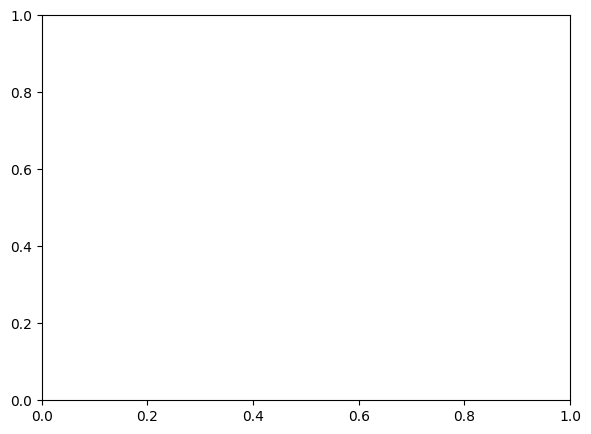

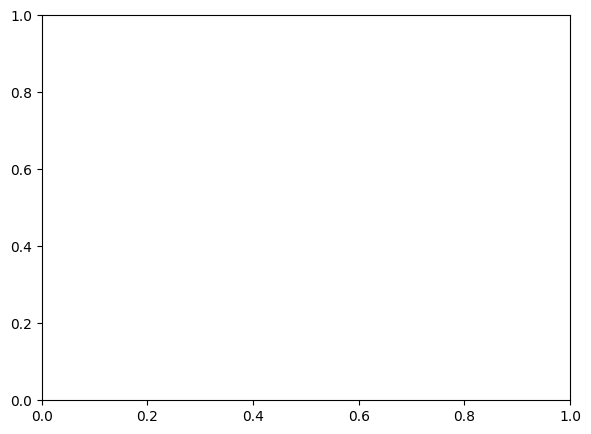

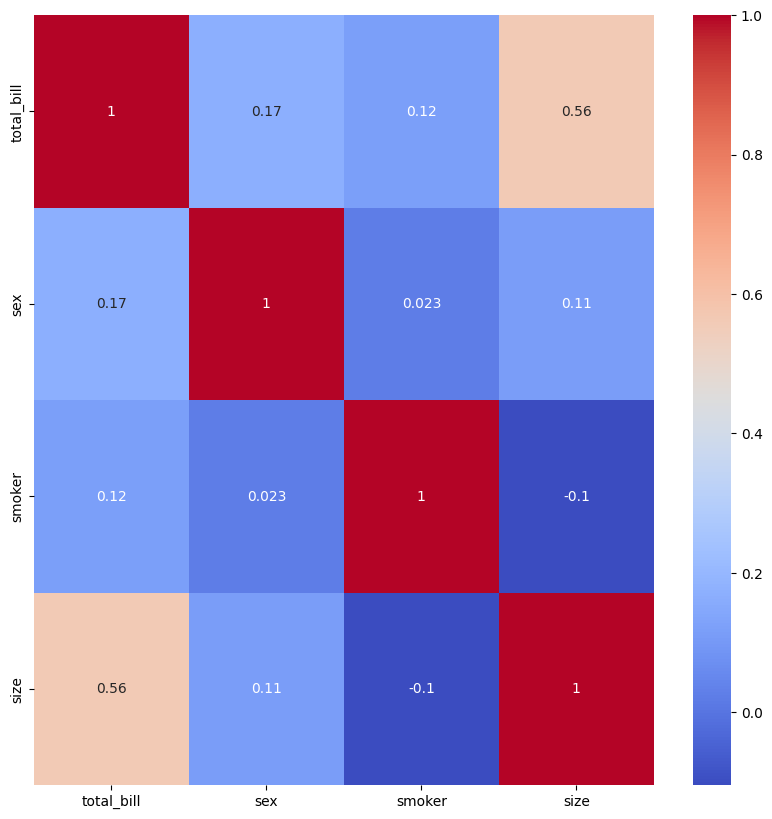

In [31]:
corr = X_train.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [32]:
df.drop(['size'],axis=1,inplace=True)

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [34]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [35]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error

Mean absolute error 0.6923244124717903
R2 score 0.36544415186316004


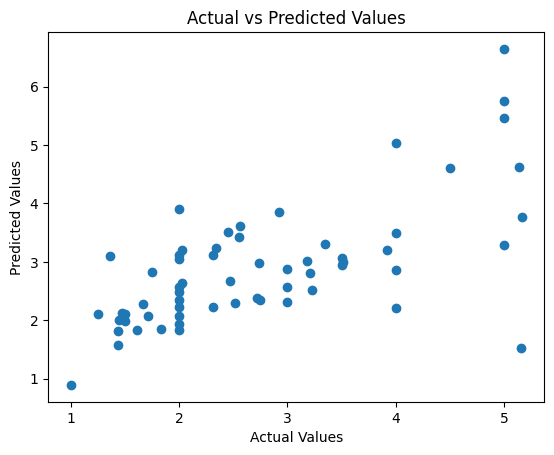

In [36]:
linreg = LinearRegression()
linreg.fit(X_train_scaled,y_train)
y_pred = linreg.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
print('Mean absolute error',mae)
print('R2 score',score)
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

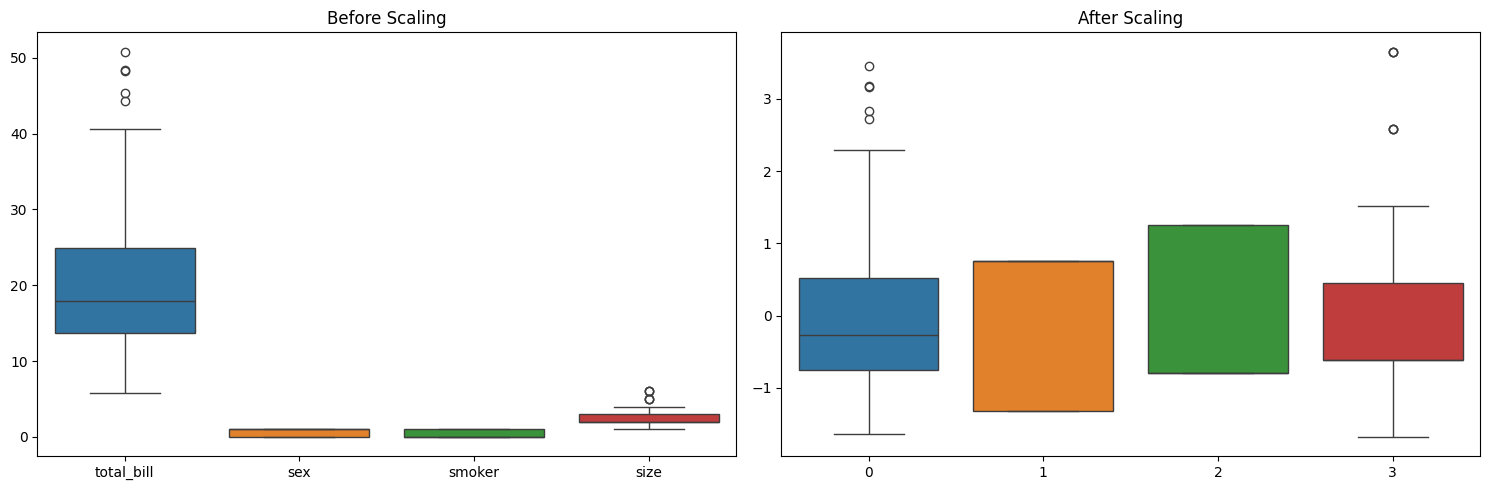

In [37]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('Before Scaling')
plt.subplot(1,2,2)
sns.boxplot(data=X_train_scaled)
plt.title('After Scaling')
plt.tight_layout()
plt.show()

Mean absolute error 1.0383552808384844
R2 score -0.07935189233401885


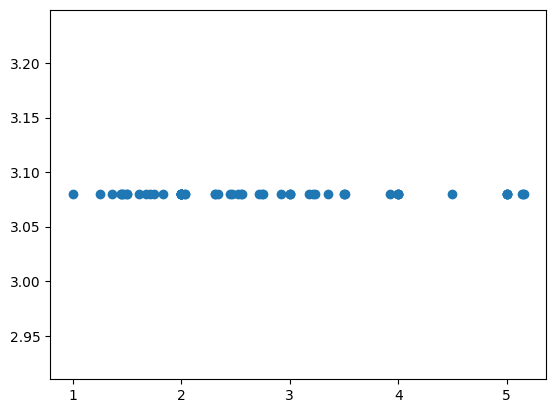

In [38]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred_lasso= lasso.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred_lasso)
score=r2_score(y_test,y_pred_lasso)
print('Mean absolute error',mae)
print('R2 score',score)
plt.scatter(y_test,y_pred_lasso)
plt.show()

Mean absolute error 0.6919258303199171
R2 score 0.367097260970228


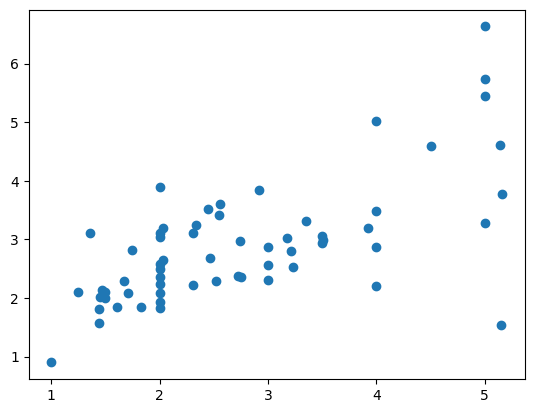

In [39]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred_ridge = ridge.predict(X_test_scaled)
mae=mean_absolute_error(y_test,y_pred_ridge)
score=r2_score(y_test,y_pred_ridge)
print('Mean absolute error',mae)
print('R2 score',score)
plt.scatter(y_test,y_pred_ridge)
plt.show()